In [1]:
#QUESTION 0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

salary = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/salary_uk.csv")
salary.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


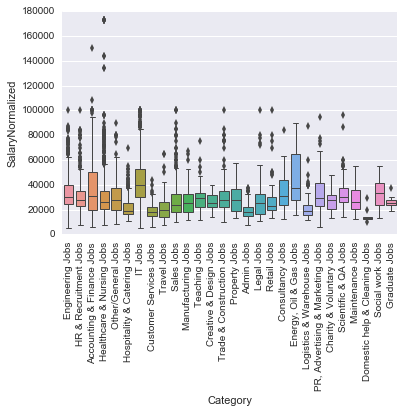

In [3]:
#GRAPHICAL PRESENTATIONS

import seaborn as sns
sns.set()
s=sns.boxplot(x="Category", y="SalaryNormalized",data=salary, linewidth=1)
s.set_xticklabels(s.get_xticklabels(),rotation="vertical");

In [4]:
#Looking at the types of data we have
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Id                    10000 non-null int64
Title                 9999 non-null object
FullDescription       10000 non-null object
LocationRaw           10000 non-null object
LocationNormalized    10000 non-null object
ContractType          3556 non-null object
ContractTime          4737 non-null object
Company               5951 non-null object
Category              10000 non-null object
SalaryRaw             10000 non-null object
SalaryNormalized      10000 non-null int64
SourceName            10000 non-null object
dtypes: int64(2), object(10)
memory usage: 937.6+ KB


In [5]:
salary.dtypes

Id                     int64
Title                 object
FullDescription       object
LocationRaw           object
LocationNormalized    object
ContractType          object
ContractTime          object
Company               object
Category              object
SalaryRaw             object
SalaryNormalized       int64
SourceName            object
dtype: object

(array([  7.,   4.,   9.,   2.,  14.,  59., 199., 212., 335., 431., 294.,
        387., 242., 321., 302., 546., 359., 582., 324., 448., 335., 222.,
        451., 211., 307., 128., 393.,  94., 302.,  82.,  61., 310., 103.,
        221.,  51., 255.,  36., 111.,  40.,   7., 192.,  28.,  75.,  33.,
        123.,  17.,  48.,   7.,   8., 114.,   5.,  42.,   7.,  58.,  14.,
         25.,   3.,   9.,  43.,  17.,  15.,   3.,  51.,   1.,  15.,  17.,
         30.,   7.,   7.,   5.,  72.,  23.,   6.,   5.,   1.,  22.,   0.,
          0.,   2.,   1.,   6.,  10.,   1.,   3.,  20.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

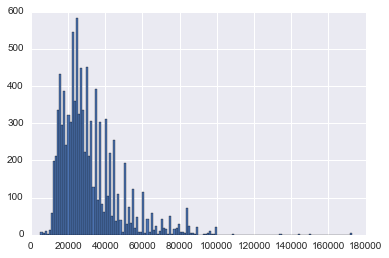

In [6]:
#Making a plot of histograms

plt.hist(salary.SalaryNormalized, bins=150)

In [7]:
# Vectorizing the texts in the data

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = TfidfVectorizer(stop_words='english', max_features=10000)
X=vect.fit_transform(salary.FullDescription)

In [8]:
# Creating a dataframe of the full description column in the dataset 
FullDesc=pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
FullDesc.head()

,00,000,00am,00pm,01,010,011,013,05,08,...,youtube,youview,yr,yrs,zahid,zealand,zend,zero,zone,zuken
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#Removing columns Id, FullDescription, SalaryRaw and LocationRaw
salary.new=salary.drop(columns=['Id','FullDescription','SalaryRaw','LocationRaw'])
salary.new.head(5)

/Users/capio/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,Title,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryNormalized,SourceName
0,Engineering Systems Analyst,Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,25000,cv-library.co.uk
1,Stress Engineer Glasgow,Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,30000,cv-library.co.uk
2,Modelling and simulation analyst,Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,30000,cv-library.co.uk
3,Engineering Systems Analyst / Mathematical Mod...,Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,27500,cv-library.co.uk
4,"Pioneer, Miser Engineering Systems Analyst",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000,cv-library.co.uk


In [10]:
# Dummy coding the categorical variables

salary.new=pd.get_dummies(salary.new, columns=["LocationNormalized", "Category","SourceName"],prefix=["Loc", "Cat","Source"])
salary.new.head()

,Title,ContractType,ContractTime,Company,SalaryNormalized,Loc_Abbots Langley,Loc_Aberdare,Loc_Aberdeen,Loc_Aberdeenshire,Loc_Abertillery,...,Source_technojobs.co.uk,Source_thecareerengineer.com,Source_thegraduate.co.uk,Source_theitjobboard.co.uk,Source_theladders.co.uk,Source_totaljobs.com,Source_uksport.gov.uk,Source_wileyjobnetwork.com,Source_workthing.com,Source_zartis.com
0,Engineering Systems Analyst,NaN,permanent,Gregory Martin International,25000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Stress Engineer Glasgow,NaN,permanent,Gregory Martin International,30000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Modelling and simulation analyst,NaN,permanent,Gregory Martin International,30000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Engineering Systems Analyst / Mathematical Mod...,NaN,permanent,Gregory Martin International,27500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Pioneer, Miser Engineering Systems Analyst",NaN,permanent,Gregory Martin International,25000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Imputing for missing values for ContractType with frequecnt contract type

salary.new = salary.new.fillna(salary.new['ContractType'].value_counts().index[0])
salary.new = salary.new.fillna(salary.new['Title'].value_counts().index[0])
salary.new = salary.new.fillna(salary.new['ContractTime'].value_counts().index[0])

In [12]:
# Using one hot encoding for the columns

salary.new=pd.get_dummies(salary.new, columns=["ContractType", "ContractTime","Title","Company"], prefix=["ConType", "ConTime","Title","Company"])
salary.new.head()

,SalaryNormalized,Loc_Abbots Langley,Loc_Aberdare,Loc_Aberdeen,Loc_Aberdeenshire,Loc_Abertillery,Loc_Abingdon,Loc_Aboyne,Loc_Accrington,Loc_Adlington,...,Company_i3 Resourcing,Company_i4 Jobs,Company_i4 Recruitment,Company_i4 Recruitment Account,Company_itk Recruitment,Company_m2r Ltd,Company_mgi recruitment,Company_ninesharp,Company_stickyfaceproductions ltd,Company_vacancy2market
0,25000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27500,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Combining the vectorized FullDescription and dummy coded columns

salarydesc=pd.concat([salary.new,FullDesc], axis=1)

In [14]:
# Data Analysis

In [15]:
x=salarydesc.drop('SalaryNormalized',axis=1)
y=salarydesc.SalaryNormalized

/Users/capio/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:1557: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return self._engine.is_unique
/Users/capio/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:3244: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target._ndarray_values)


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
print x_train.shape
print x_test.shape


/Users/capio/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2022: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return key in self._engine


(7500, 20478)
(2500, 20478)


In [17]:
# K Nearest Neighbor

from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(x_train, y_train)
print("Train set R^2: {:.2f}".format(reg.score(x_train, y_train)))
print("Test set R^2: {:.2f}".format(reg.score(x_test, y_test)))


Train set R^2: 0.75
Test set R^2: 0.46


In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(x_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print("Training set score: {:.2f}".format(lr.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(x_test, y_test)))
print("Number of features used: {}".format(np.sum(lr.coef_ != 0)))


lr.coef_: [-5.03509443e+13  2.48275052e+13 -4.51993072e+12 ... -1.91769236e+12
 -5.58419519e+12  9.86475052e+10]
lr.intercept_: -1.2113043457e+11
Training set score: 1.00
Test set score: -14067753898746982400.00
Number of features used: 19824


In [19]:
#Ridge Regression for different alpha values

from sklearn.linear_model import Ridge, RidgeCV

ridge = Ridge().fit(x_train, y_train)
print("ridge.coef_: {}".format(ridge.coef_))
print("ridge.intercept_: {}".format(ridge.intercept_))
print("Training set score: {:.2f}".format(ridge.score(x_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(x_test, y_test)))
print("Number of features used: {}".format(np.sum(ridge.coef_ != 0)))

ridge.coef_: [ 5594.12676515 -1126.85711414  6294.07046717 ...   150.76853212
 -2336.63577106    51.47769033]
ridge.intercept_: 32991.7229408
Training set score: 0.95
Test set score: 0.64
Number of features used: 18255


In [20]:
ridgecv=Ridge(alpha=0.001).fit(x_train,y_train)
print("Training set score: {:.2f}".format(ridgecv.score(x_train, y_train)))
print("Test set score: {:.2f}".format(ridgecv.score(x_test, y_test)))
print("Number of features used: {}".format(np.sum(ridgecv.coef_ != 0)))


Training set score: 1.00
Test set score: 0.59
Number of features used: 18255


In [21]:
ridgecv=Ridge(alpha=0.1).fit(x_train,y_train)
print("Training set score: {:.2f}".format(ridgecv.score(x_train, y_train)))
print("Test set score: {:.2f}".format(ridgecv.score(x_test, y_test)))
print("Number of features used: {}".format(np.sum(ridgecv.coef_ != 0)))

Training set score: 1.00
Test set score: 0.63
Number of features used: 18255


In [22]:
ridgecv=Ridge(alpha=1).fit(x_train,y_train)
print("Training set score: {:.2f}".format(ridgecv.score(x_train, y_train)))
print("Test set score: {:.2f}".format(ridgecv.score(x_test, y_test)))
print("Number of features used: {}".format(np.sum(ridgecv.coef_ != 0)))


Training set score: 0.95
Test set score: 0.64
Number of features used: 18255


In [23]:
# Lasso Regression

from sklearn.linear_model import Lasso

lasso = Lasso().fit(x_train, y_train)
print("lasso.coef_: {}".format(lasso.coef_))
print("lasso.intercept_: {}".format(lasso.intercept_))
print("Training set score: {:.2f}".format(lasso.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(x_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

lasso.coef_: [6968.008963     -0.         3447.36294704 ...   -0.           -0.
    0.        ]
lasso.intercept_: 26120.9142104
Training set score: 0.92
Test set score: 0.62
Number of features used: 2862


In [24]:
lassocv=Lasso(alpha=0.001).fit(x_train,y_train)
print("Training set score: {:.2f}".format(lassocv.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lassocv.score(x_test, y_test)))
print("Number of features used: {}".format(np.sum(lassocv.coef_ != 0)))


/Users/capio/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Training set score: 1.00
Test set score: 0.43
Number of features used: 10437


In [25]:
lassocv=Lasso(alpha=0.1).fit(x_train,y_train)
print("Training set score: {:.2f}".format(lassocv.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lassocv.score(x_test, y_test)))
print("Number of features used: {}".format(np.sum(lassocv.coef_ != 0)))


/Users/capio/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Training set score: 1.00
Test set score: 0.60
Number of features used: 6988


In [26]:
lassocv=Lasso(alpha=1).fit(x_train,y_train)
print("Training set score: {:.2f}".format(lassocv.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lassocv.score(x_test, y_test)))
print("Number of features used: {}".format(np.sum(lassocv.coef_ != 0)))


Training set score: 0.92
Test set score: 0.62
Number of features used: 2862


In [27]:
# Decision Trees

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor().fit(x_train, y_train)

print('Decision Tree regressor score on training set: {:.2f}'
     .format(dtr.score(x_train, y_train)))
print('Decision Tree regressor on test set: {:.2f}'
     .format(dtr.score(x_test, y_test)))

Decision Tree regressor score on training set: 1.00
Decision Tree regressor on test set: 0.24


In [28]:
# In summary, Ridge and Lasso Regressio performed better with respect to the test scores.